# [전처리] Python Pandas를 이용한 데이터프레임 재구조화


## 우리에게 있는 문제점!

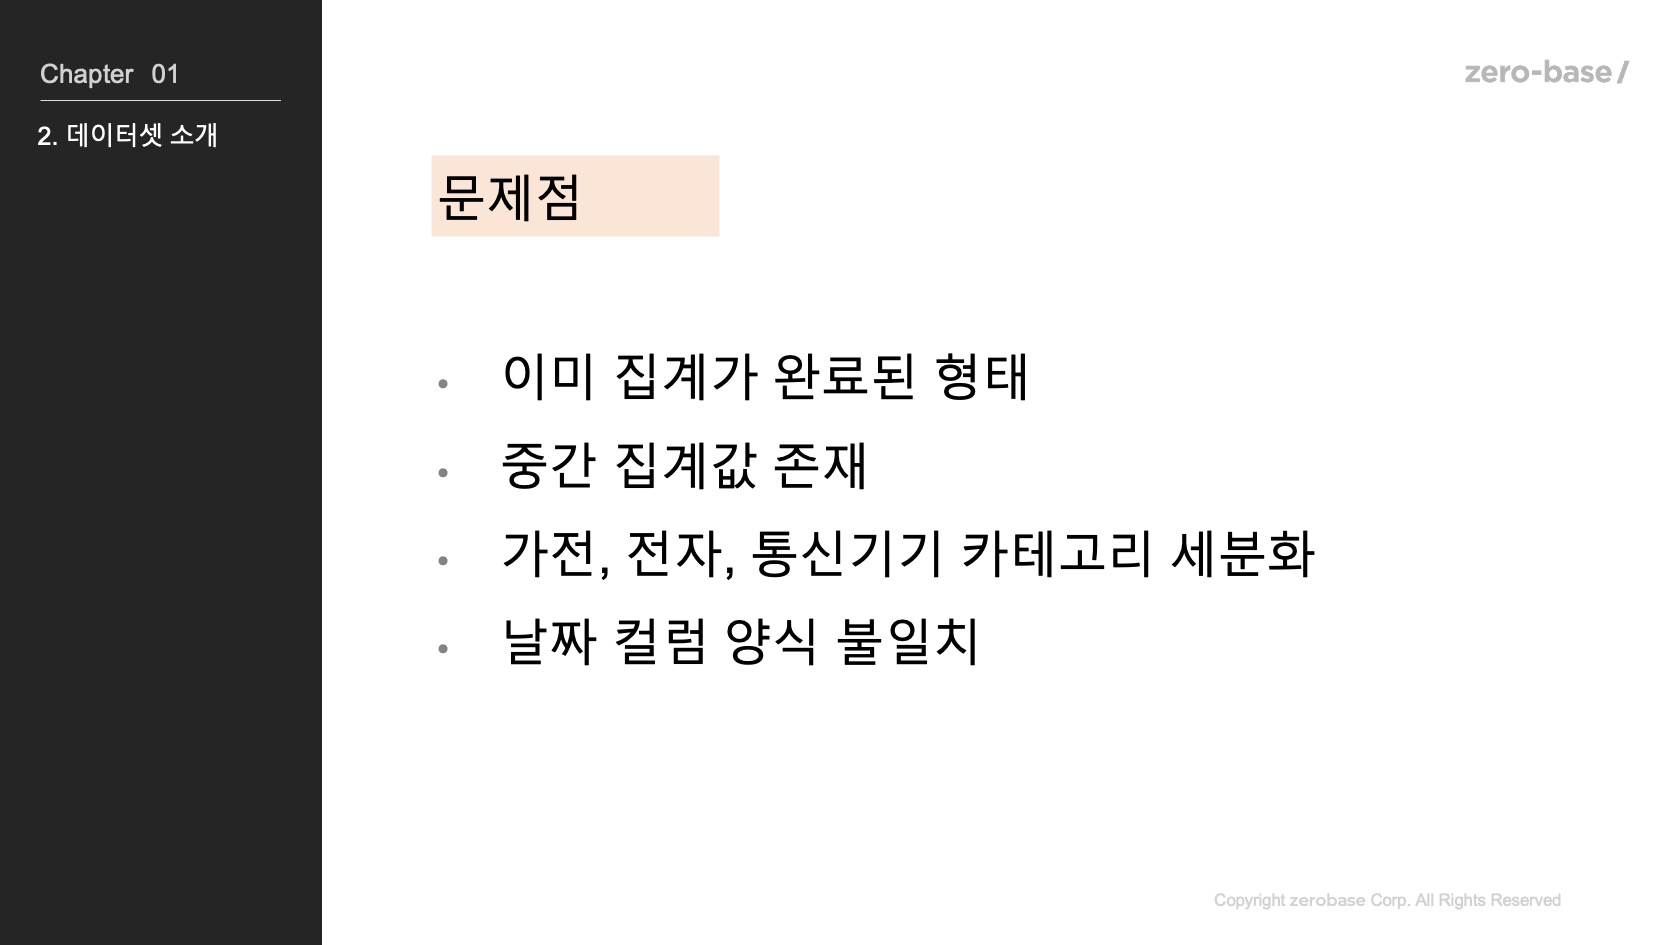


## 1번 문제 : 집계가 완료된 형태 > 재구조화를 위한 메서드를 적용합니다 
    - pd.melt()
    - pd.pivot_table()

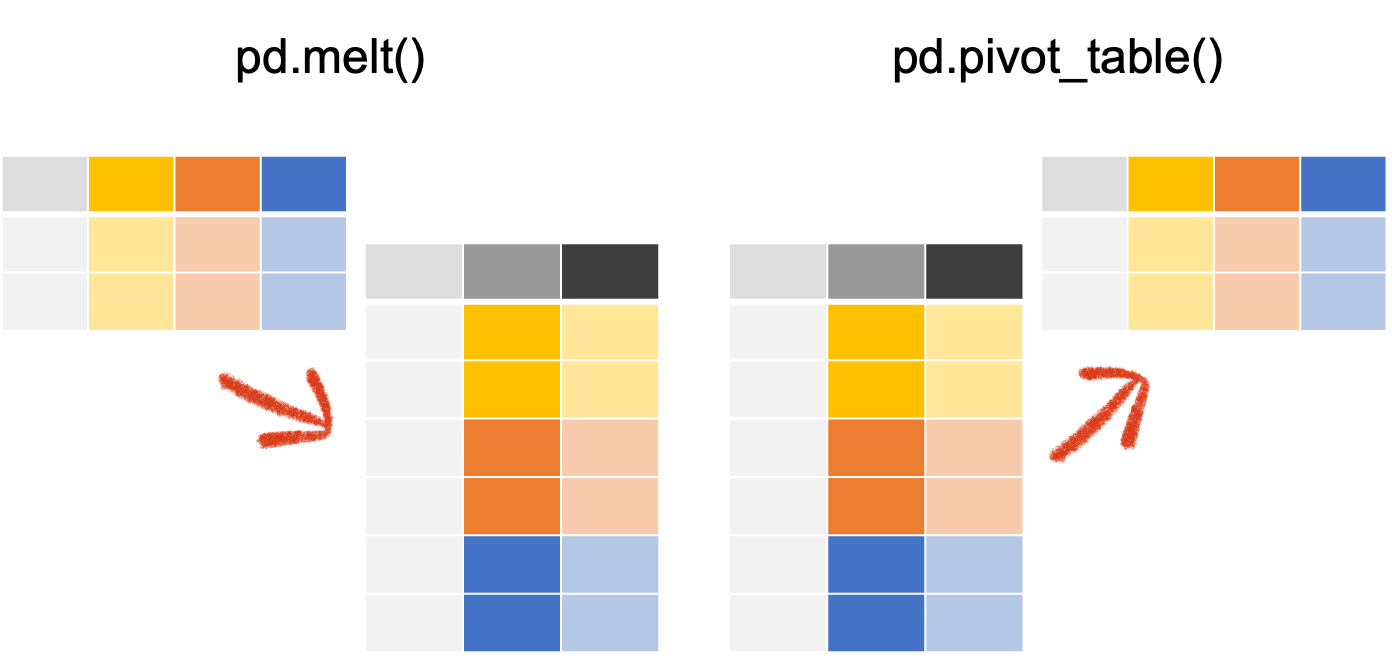

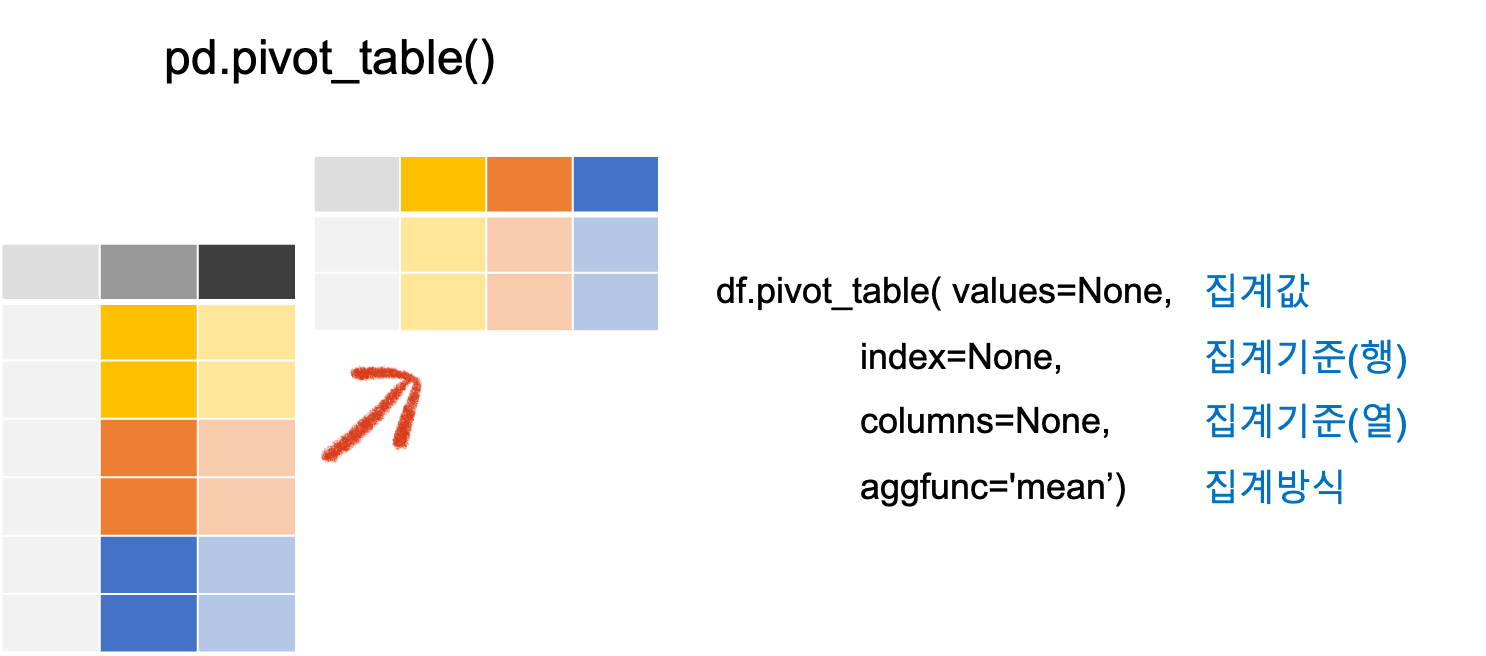

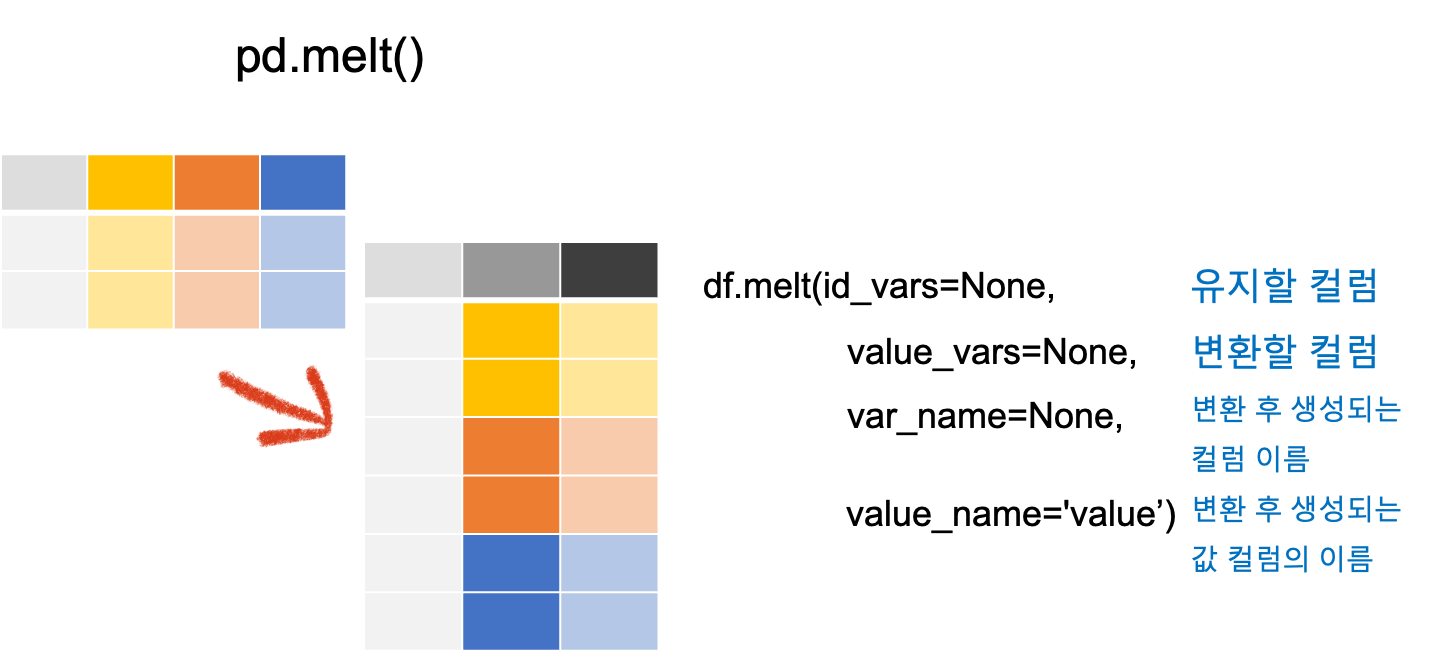

## 준비! 

In [83]:
import pandas as pd

In [84]:
route1 = '/Users/kimhyeryoung/Documents/ds_study/Chapter 1. 공공 데이터를 통한 시장 동향 이해/Data/1_온라인쇼핑몰 운영형태별 상품군별거래액.csv'

In [85]:
df = pd.read_csv(route1, encoding='euc-kr')

In [86]:
df.head() # 한글이 깨집니다?! 

,상품군별(1),상품군별(2),운영형태별(1),2017.01,2017.02,2017.03,2017.04,2017.05,2017.06,2017.07,...,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04 p),2023.05 p)
0,합계,소계,계,7310479,7148849,7747011,7380795,7621719,7515130,7898554,...,18008583,17358050,17970891,18438854,18897567,18042084,17041993,18630111,17788676,19246334
1,합계,소계,온라인 전용몰,4712488,4619215,5094744,4966280,5108106,5071821,5326514,...,13931215,13219057,13764267,14241152,14525255,13769727,13039101,14016273,13542199,14620356
2,합계,소계,온·오프라인 병행몰,2597990,2529634,2652267,2414515,2513613,2443308,2572040,...,4077368,4138994,4206624,4197701,4372312,4272357,4002893,4613838,4246477,4625978
3,컴퓨터 및 주변기기,소계,계,422384,475342,473351,368280,350923,376719,380974,...,724630,686982,670787,799034,760540,786027,888101,864298,669968,704318
4,컴퓨터 및 주변기기,소계,온라인 전용몰,350585,395409,391170,302977,284161,305461,312458,...,562010,536852,526047,635832,567317,616344,694608,649837,520715,572140


In [87]:
df = pd.read_csv(route1, encoding = 'cp949')

# 한글 encoding이 필요한 데이터셋입니다 

In [88]:
#UnicodeDecodeError: 'cp949' codec can't decode byte 0xed in position 23: illegal multibyte sequence
#df = pd.read_csv(route1, encoding = 'utf-8-sig')

In [89]:
df.head() # cp949 인코딩일때 정상적으로 불러왔습니다

,상품군별(1),상품군별(2),운영형태별(1),2017.01,2017.02,2017.03,2017.04,2017.05,2017.06,2017.07,...,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04 p),2023.05 p)
0,합계,소계,계,7310479,7148849,7747011,7380795,7621719,7515130,7898554,...,18008583,17358050,17970891,18438854,18897567,18042084,17041993,18630111,17788676,19246334
1,합계,소계,온라인 전용몰,4712488,4619215,5094744,4966280,5108106,5071821,5326514,...,13931215,13219057,13764267,14241152,14525255,13769727,13039101,14016273,13542199,14620356
2,합계,소계,온·오프라인 병행몰,2597990,2529634,2652267,2414515,2513613,2443308,2572040,...,4077368,4138994,4206624,4197701,4372312,4272357,4002893,4613838,4246477,4625978
3,컴퓨터 및 주변기기,소계,계,422384,475342,473351,368280,350923,376719,380974,...,724630,686982,670787,799034,760540,786027,888101,864298,669968,704318
4,컴퓨터 및 주변기기,소계,온라인 전용몰,350585,395409,391170,302977,284161,305461,312458,...,562010,536852,526047,635832,567317,616344,694608,649837,520715,572140


## 데이터 탐색

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 80 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   상품군별(1)     78 non-null     object
 1   상품군별(2)     78 non-null     object
 2   운영형태별(1)    78 non-null     object
 3   2017.01     78 non-null     object
 4   2017.02     78 non-null     object
 5   2017.03     78 non-null     object
 6   2017.04     78 non-null     object
 7   2017.05     78 non-null     object
 8   2017.06     78 non-null     object
 9   2017.07     78 non-null     object
 10  2017.08     78 non-null     object
 11  2017.09     78 non-null     object
 12  2017.10     78 non-null     object
 13  2017.11     78 non-null     object
 14  2017.12     78 non-null     object
 15  2018.01     78 non-null     object
 16  2018.02     78 non-null     object
 17  2018.03     78 non-null     object
 18  2018.04     78 non-null     object
 19  2018.05     78 non-null     object
 20  2018.06     

In [91]:
df.columns
df.columns[0]

'상품군별(1)'

In [92]:
# 상품군 카테고리 
df[df.columns[0]].unique()

array(['합계', '컴퓨터 및 주변기기', '가전·전자·통신기기', '서적', '사무·문구', '의복', '신발', '가방',
       '패션용품 및 액세서리', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품', '자동차 및 자동차용품', '가구', '애완용품', '여행 및 교통서비스', '문화 및 레저서비스',
       '이쿠폰서비스', '음식서비스', '기타서비스', '기타'], dtype=object)

In [93]:
df["상품군별(1)"].unique()

array(['합계', '컴퓨터 및 주변기기', '가전·전자·통신기기', '서적', '사무·문구', '의복', '신발', '가방',
       '패션용품 및 액세서리', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품', '자동차 및 자동차용품', '가구', '애완용품', '여행 및 교통서비스', '문화 및 레저서비스',
       '이쿠폰서비스', '음식서비스', '기타서비스', '기타'], dtype=object)

In [94]:
df[df["상품군별(1)"] == "음식서비스"]

,상품군별(1),상품군별(2),운영형태별(1),2017.01,2017.02,2017.03,2017.04,2017.05,2017.06,2017.07,...,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04 p),2023.05 p)
69,음식서비스,소계,계,183355,173924,192095,196543,210565,195630,224624,...,2277393,2002170,2139561,2074227,2300232,2233259,2028048,2108928,2107044,2184360
70,음식서비스,소계,온라인 전용몰,155733,151531,169969,173147,185985,171939,198934,...,2215912,1945385,2080823,2017327,2234779,2161023,1965745,2050301,2050954,2128420
71,음식서비스,소계,온·오프라인 병행몰,27623,22393,22126,23397,24580,23692,25691,...,61481,56785,58738,56900,65453,72236,62303,58627,56090,55940


In [95]:
# 운영형태 
df[df.columns[2]].unique()

array(['계', '온라인 전용몰', '온·오프라인 병행몰'], dtype=object)

In [96]:
df["운영형태별(1)"].unique()

array(['계', '온라인 전용몰', '온·오프라인 병행몰'], dtype=object)

In [97]:
df[df["운영형태별(1)"] == "온라인 전용몰"]

,상품군별(1),상품군별(2),운영형태별(1),2017.01,2017.02,2017.03,2017.04,2017.05,2017.06,2017.07,...,2022.08,2022.09,2022.10,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04 p),2023.05 p)
1,합계,소계,온라인 전용몰,4712488,4619215,5094744,4966280,5108106,5071821,5326514,...,13931215,13219057,13764267,14241152,14525255,13769727,13039101,14016273,13542199,14620356
4,컴퓨터 및 주변기기,소계,온라인 전용몰,350585,395409,391170,302977,284161,305461,312458,...,562010,536852,526047,635832,567317,616344,694608,649837,520715,572140
7,가전·전자·통신기기,소계,온라인 전용몰,465062,487668,524450,559478,672600,584944,729535,...,1499900,1383888,1652864,1593016,1461364,1410624,1521183,1363868,1294913,1579040
10,가전·전자·통신기기,가전·전자,온라인 전용몰,-,-,-,-,-,-,-,...,1006430,876307,956716,1147315,1043057,954857,913668,930970,937646,1194586
13,가전·전자·통신기기,통신기기,온라인 전용몰,-,-,-,-,-,-,-,...,493470,507581,696148,445701,418307,455767,607515,432898,357267,384454
16,서적,소계,온라인 전용몰,43716,45396,52014,37367,35363,35106,44330,...,96814,68829,62306,81114,85834,87046,89789,99523,72179,77651
19,사무·문구,소계,온라인 전용몰,37630,44824,52536,45571,40733,42211,39698,...,114821,118439,133611,150142,183220,130898,139558,157257,140719,131002
22,의복,소계,온라인 전용몰,628483,614162,773722,723872,725010,684739,661511,...,796236,953312,1154661,1161063,1149179,833290,818220,1101052,997382,1065422
25,신발,소계,온라인 전용몰,71652,77835,109183,108686,115003,113217,101604,...,150315,162896,193572,202084,215740,144788,147333,193908,183597,198744
28,가방,소계,온라인 전용몰,94156,108446,115709,105625,106380,104729,106690,...,155288,151517,140421,152039,132917,140720,133778,146960,137444,139176


## 재구조화 : pd.melt()


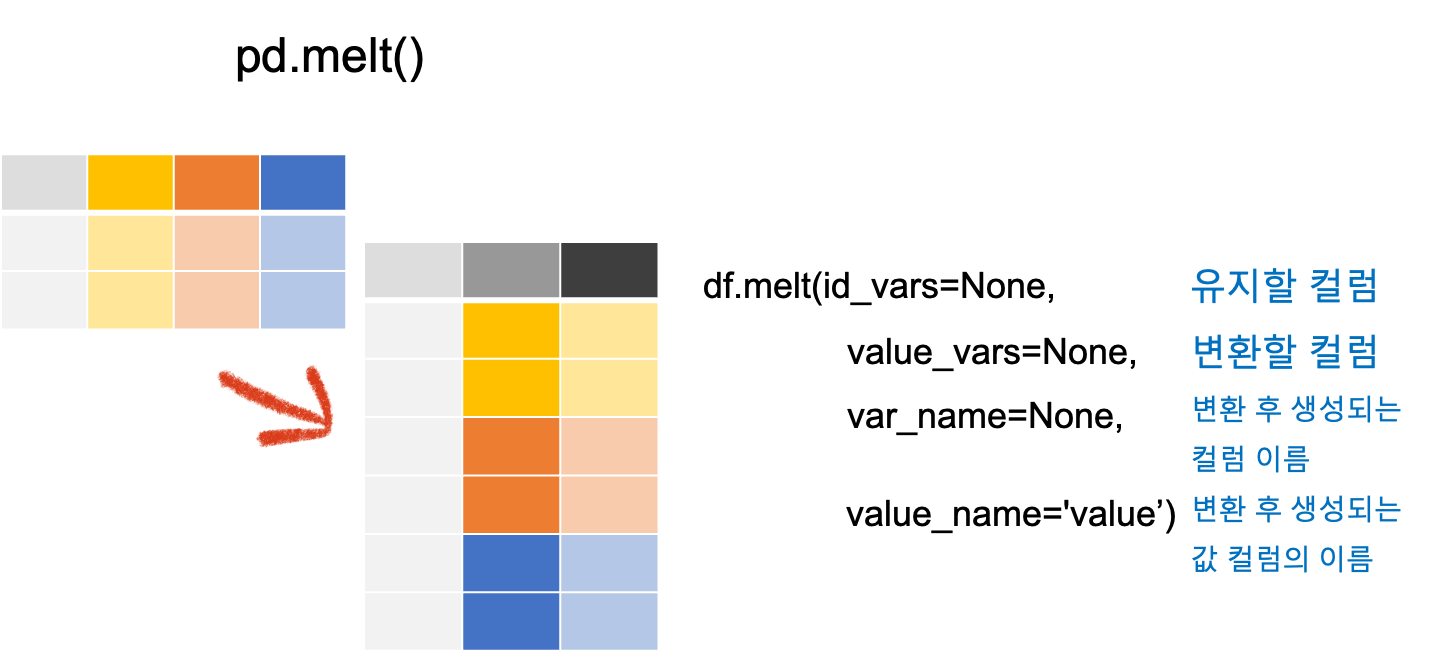

In [98]:
df.melt() #pd.melt(df)
df.melt().tail(30)

,variable,value
6210,2023.05 p),1491177
6211,2023.05 p),1333885
6212,2023.05 p),157291
6213,2023.05 p),307168
6214,2023.05 p),135059
6215,2023.05 p),172108
6216,2023.05 p),439345
6217,2023.05 p),391441
6218,2023.05 p),47904
6219,2023.05 p),212987


In [99]:
df.melt("상품군별(1)")

,상품군별(1),variable,value
0,합계,상품군별(2),소계
1,합계,상품군별(2),소계
2,합계,상품군별(2),소계
3,컴퓨터 및 주변기기,상품군별(2),소계
4,컴퓨터 및 주변기기,상품군별(2),소계
...,...,...,...
6157,기타서비스,2023.05 p),133405
6158,기타서비스,2023.05 p),36863
6159,기타,2023.05 p),276436
6160,기타,2023.05 p),251654


In [100]:
cate_cols = list(df.columns[:3])
cate_cols

['상품군별(1)', '상품군별(2)', '운영형태별(1)']

In [101]:
pd.melt(df, id_vars = list(df.columns[:3]))
# 유지할 컬럼 외 컬럼은 세로로 길게 펴버립니다.  

# 먼저 재구조화할 데이터프레임(df)을 써주고
# id_vars는 인덱스(기준)입니다 

,상품군별(1),상품군별(2),운영형태별(1),variable,value
0,합계,소계,계,2017.01,7310479
1,합계,소계,온라인 전용몰,2017.01,4712488
2,합계,소계,온·오프라인 병행몰,2017.01,2597990
3,컴퓨터 및 주변기기,소계,계,2017.01,422384
4,컴퓨터 및 주변기기,소계,온라인 전용몰,2017.01,350585
...,...,...,...,...,...
6001,기타서비스,소계,온라인 전용몰,2023.05 p),133405
6002,기타서비스,소계,온·오프라인 병행몰,2023.05 p),36863
6003,기타,소계,계,2023.05 p),276436
6004,기타,소계,온라인 전용몰,2023.05 p),251654


In [102]:
#var_name과 value_name으로 column명을 바로 지정할 수 있습니다 
#var_name은 melt를 통해 새로 생기는 집계 기준 
#value_name은 값을 의미하는 column 입니다 

pd.melt(df, id_vars = cate_cols, var_name = '날짜', value_name = '거래액')

,상품군별(1),상품군별(2),운영형태별(1),날짜,거래액
0,합계,소계,계,2017.01,7310479
1,합계,소계,온라인 전용몰,2017.01,4712488
2,합계,소계,온·오프라인 병행몰,2017.01,2597990
3,컴퓨터 및 주변기기,소계,계,2017.01,422384
4,컴퓨터 및 주변기기,소계,온라인 전용몰,2017.01,350585
...,...,...,...,...,...
6001,기타서비스,소계,온라인 전용몰,2023.05 p),133405
6002,기타서비스,소계,온·오프라인 병행몰,2023.05 p),36863
6003,기타,소계,계,2023.05 p),276436
6004,기타,소계,온라인 전용몰,2023.05 p),251654


In [103]:
df2 = pd.melt(df, id_vars = cate_cols, var_name = '날짜', value_name = '거래액')

## 재구조화 : pd.pivot_table() , 그리고 데이터 타입 변경!


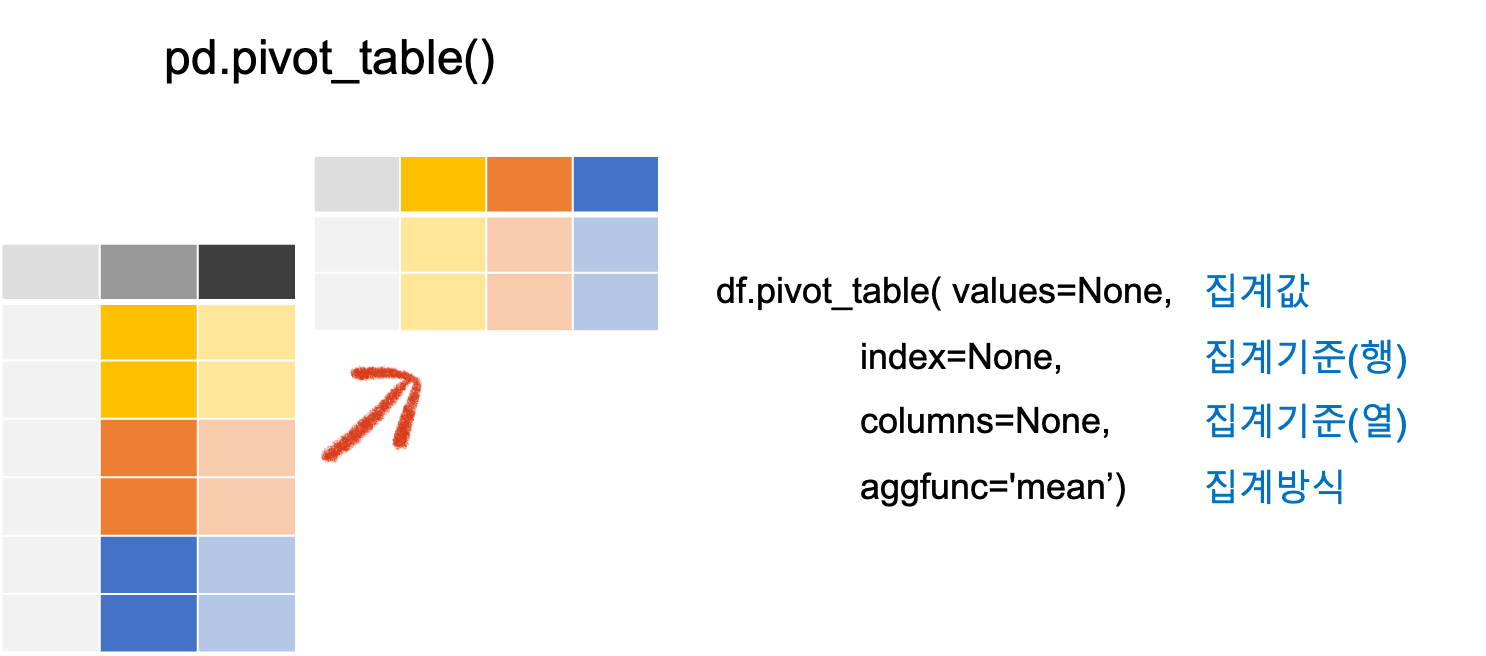

In [55]:
# 피봇은 값을 집계도 해주고
# 모양도 바꿀 수 있다 (행, 열 지정 )

In [104]:

result = df2.copy()

In [105]:
result.head()

,상품군별(1),상품군별(2),운영형태별(1),날짜,거래액
0,합계,소계,계,2017.01,7310479
1,합계,소계,온라인 전용몰,2017.01,4712488
2,합계,소계,온·오프라인 병행몰,2017.01,2597990
3,컴퓨터 및 주변기기,소계,계,2017.01,422384
4,컴퓨터 및 주변기기,소계,온라인 전용몰,2017.01,350585


In [106]:
result.columns

Index(['상품군별(1)', '상품군별(2)', '운영형태별(1)', '날짜', '거래액'], dtype='object')

In [107]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6006 entries, 0 to 6005
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   상품군별(1)   6006 non-null   object
 1   상품군별(2)   6006 non-null   object
 2   운영형태별(1)  6006 non-null   object
 3   날짜        6006 non-null   object
 4   거래액       6006 non-null   object
dtypes: object(5)
memory usage: 234.7+ KB


In [108]:
result.pivot_table(index = ['상품군별(1)', '상품군별(2)', '운영형태별(1)', '날짜'])

TypeError: Could not convert - to numeric

## 거래액의 데이터타입이 숫자가 아닙니다! 

In [109]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6006 entries, 0 to 6005
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   상품군별(1)   6006 non-null   object
 1   상품군별(2)   6006 non-null   object
 2   운영형태별(1)  6006 non-null   object
 3   날짜        6006 non-null   object
 4   거래액       6006 non-null   object
dtypes: object(5)
memory usage: 234.7+ KB


In [110]:
[type(i) for i in result["거래액"]]

[str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str

In [111]:
# 1) list comprehension : 리스트를 빠르고 간결하게 만드는 비결 
# 2) set = 파이썬 자료형의 하나로, 중복을 제거한 집합
# list에 set을 씌우면 unique값만 간편하게 확인할 수 있습니다 

set([type(i) for i in result["거래액"]])

{int, str}

In [112]:
[i for i in result["거래액"] if type(i) != int]

['7310479',
 '4712488',
 '2597990',
 '422384',
 '350585',
 '71800',
 '602122',
 '465062',
 '137060',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '151230',
 '43716',
 '107514',
 '53192',
 '37630',
 '15562',
 '864515',
 '628483',
 '236032',
 '103798',
 '71652',
 '32146',
 '143643',
 '94156',
 '49487',
 '143439',
 '83229',
 '60209',
 '201380',
 '152348',
 '49032',
 '654145',
 '246020',
 '408125',
 '259790',
 '212378',
 '47412',
 '675851',
 '426900',
 '248951',
 '259029',
 '143965',
 '115064',
 '592310',
 '441862',
 '150448',
 '80144',
 '72303',
 '7841',
 '188602',
 '123424',
 '65178',
 '53096',
 '49161',
 '3935',
 '1215463',
 '556367',
 '659096',
 '164254',
 '85177',
 '79078',
 '88648',
 '86470',
 '2178',
 '183355',
 '155733',
 '27623',
 '65597',
 '61247',
 '4350',
 '144492',
 '124622',
 '19870',
 '7148849',
 '4619215',
 '2529634',
 '475342',
 '395409',
 '79933',
 '626874',
 '487668',
 '139206',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '154330',
 '45396',
 '108933',
 '60403',
 '44824',
 '15579',
 '8

In [113]:
result["거래액"]

0       7310479
1       4712488
2       2597990
3        422384
4        350585
         ...   
6001     133405
6002      36863
6003     276436
6004     251654
6005      24781
Name: 거래액, Length: 6006, dtype: object

In [114]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6006 entries, 0 to 6005
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   상품군별(1)   6006 non-null   object
 1   상품군별(2)   6006 non-null   object
 2   운영형태별(1)  6006 non-null   object
 3   날짜        6006 non-null   object
 4   거래액       6006 non-null   object
dtypes: object(5)
memory usage: 234.7+ KB


In [115]:
#문자열을 정수로 바꿔봅시다 

def strtoint(x) : 
    
    if type(x) == str : #type이 string이면 
        x = x.replace("-", "0") # - 를 0으로 바꿔줍니다 (참고. replace는 string에 적용되는 함수로, 바로 int로 바꿀 수는 없어요!)
        x = int(x) # int를 씌워서 int로 바꿉니다 
    
    else : #그 외의 type은 이미 Int이므로 pass 하겠습니다 
        pass 
    
    return x 

In [116]:
result["거래액"].apply(strtoint) #apply는 series에 일괄적으로 함수를 적용시킬때 쓸 수 있습니다! 
result["거래액"] = result["거래액"].apply(strtoint)

In [117]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6006 entries, 0 to 6005
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   상품군별(1)   6006 non-null   object
 1   상품군별(2)   6006 non-null   object
 2   운영형태별(1)  6006 non-null   object
 3   날짜        6006 non-null   object
 4   거래액       6006 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 234.7+ KB


In [118]:
result.columns

Index(['상품군별(1)', '상품군별(2)', '운영형태별(1)', '날짜', '거래액'], dtype='object')

In [119]:
# 이제 다시 pivot을 쳐봅시다 
result.pivot_table(values = '거래액',index = ['상품군별(1)', '상품군별(2)'])

거래액
상품군별(1)     상품군별(2)              
가구          소계       2.334500e+05
가방          소계       1.310030e+05
가전·전자·통신기기  가전·전자    4.334972e+05
            소계       8.823355e+05
            통신기기     1.453449e+05
기타          소계       1.758029e+05
기타서비스       소계       8.418410e+04
농축수산물       소계       3.261726e+05
문화 및 레저서비스  소계       1.003390e+05
사무·문구       소계       6.929383e+04
생활용품        소계       6.865014e+05
서적          소계       1.209904e+05
스포츠·레저용품    소계       2.646785e+05
신발          소계       1.546507e+05
아동·유아용품     소계       2.430531e+05
애완용품        소계       8.108937e+04
여행 및 교통서비스  소계       8.003382e+05
음·식료품       소계       9.703673e+05
음식서비스       소계       8.526673e+05
의복          소계       8.621241e+05
이쿠폰서비스      소계       2.457919e+05
자동차 및 자동차용품 소계       1.272427e+05
컴퓨터 및 주변기기  소계       4.049096e+05
패션용품 및 액세서리 소계       1.582459e+05
합계          소계       8.599445e+06
화장품         소계       6.242141e+05

In [120]:
# 이제 다시 pivot table을 만들어봅시다 
result.pivot_table(index = ['상품군별(1)', '상품군별(2)', '운영형태별(1)'], columns = '날짜')

거래액                                      \
날짜                          2017.01  2017.02  2017.03  2017.04  2017.05   
상품군별(1) 상품군별(2) 운영형태별(1)                                                  
가구      소계      계            188602   219176   240688   206024   201440   
                온·오프라인 병행몰    65178    72616    76379    67356    66080   
                온라인 전용몰      123424   146560   164308   138668   135359   
가방      소계      계            143643   163204   168660   159399   152370   
                온·오프라인 병행몰    49487    54758    52951    53774    45991   
...                             ...      ...      ...      ...      ...   
합계      소계      온·오프라인 병행몰  2597990  2529634  2652267  2414515  2513613   
                온라인 전용몰     4712488  4619215  5094744  4966280  5108106   
화장품     소계      계            654145   729228   715294   583336   622853   
                온·오프라인 병행몰   408125   486334   461326   337431   370375   
                온라인 전용몰      246020   242894   253968   245905   252477   

                                                                         ...  \
날짜                          2017.06  2017.07  2017.08  2017.09  2017.10  ...   
상품군별(1) 상품군별(2) 운영형태별(1)                                                 ...   
가구      소계      계            203584   211657   226983   227801   223084  ...   
                온·오프라인 병행몰    65956    67930    73035    76612    74375  ...   
                온라인 전용몰      137628   143727   153948   151189   148709  ...   
가방      소계      계            149442   151719   163461   165215   157007  ...   
                온·오프라인 병행몰    44713    45029    52231    52103    52393  ...   
...                             ...      ...      ...      ...      ...  ...   
합계      소계      온·오프라인 병행몰  2443308  2572040  2651780  2761422  2635078  ...   
                온라인 전용몰     5071821  5326514  5207878  5389721  5026725  ...   
화장품     소계      계            652533   619456   652563   717116   677876  ...   
                온·오프라인 병행몰   392556   373568   414013   465978   437076  ...   
                온라인 전용몰      259977   245888   238550   251137   240801  ...   

                                                                              \
날짜                           2022.08   2022.09   2022.10   2022.11   2022.12   
상품군별(1) 상품군별(2) 운영형태별(1)                                                       
가구      소계      계             434127    404486    430957    434580    424118   
                온·오프라인 병행몰     59107     50597     56465     47733     49546   
                온라인 전용몰       375019    353889    374492    386847    374572   
가방      소계      계             235994    232079    218194    234239    216635   
                온·오프라인 병행몰     80706     80562     77773     82200     83718   
...                              ...       ...       ...       ...       ...   
합계      소계      온·오프라인 병행몰   4077368   4138994   4206624   4197701   4372312   
                온라인 전용몰     13931215  13219057  13764267  14241152  14525255   
화장품     소계      계             882693    921376    908131    917463    928561   
                온·오프라인 병행몰    290534    357347    329483    289777    297512   
                온라인 전용몰       592159    564029    578648    627685    631049   

                                                                                
날짜                           2023.01   2023.02   2023.03 2023.04 p) 2023.05 p)  
상품군별(1) 상품군별(2) 운영형태별(1)                                                        
가구      소계      계             414847    447252    476132     420198     439345  
                온·오프라인 병행몰     48959     48678     60249      48845      47904  
                온라인 전용몰       365888    398574    415882     371353     391441  
가방      소계      계             235179    244744    272692     255741     256369  
                온·오프라인 병행몰     94459    110967    125733     118297     117193  
...                              ...       ...       ...        ...        ...  
합계      소계

In [121]:
# 이제 다시 pivot을 쳐봅시다 
result.pivot_table(values = '거래액', index = ['상품군별(1)', '운영형태별(1)'])

거래액
상품군별(1) 운영형태별(1)                
가구      계           3.501750e+05
        온·오프라인 병행몰  7.011403e+04
        온라인 전용몰     2.800609e+05
가방      계           1.965044e+05
        온·오프라인 병행몰  6.730577e+04
...                          ...
합계      온·오프라인 병행몰  3.498428e+06
        온라인 전용몰     9.400740e+06
화장품     계           9.363212e+05
        온·오프라인 병행몰  5.311587e+05
        온라인 전용몰     4.051624e+05

[72 rows x 1 columns]

In [122]:
# pivot_table은 집계함수를 쓸 수 있습니다 
# 집계 : 합계, 평균, 최댓값, 최솟값 등등 

result.pivot_table(values = '거래액'
               , index = '상품군별(1)'
               , aggfunc = 'mean')

,거래액
상품군별(1),
가구,2.334500e+05
가방,1.310030e+05
가전·전자·통신기기,4.870592e+05
기타,1.758029e+05
기타서비스,8.418410e+04
농축수산물,3.261726e+05
문화 및 레저서비스,1.003390e+05
사무·문구,6.929383e+04
생활용품,6.865014e+05


In [123]:

# pivot_table은 집계함수를 쓸 수 있습니다 

result.pivot_table( values= '거래액'
               , index = '상품군별(1)'
               , aggfunc = 'sum')

,거래액
상품군별(1),
가구,53926941
가방,30261685
가전·전자·통신기기,337532021
기타,40610466
기타서비스,19446527
농축수산물,75345865
문화 및 레저서비스,23178320
사무·문구,16006874
생활용품,158581819


## 2번 문제 : 총합, 중간 집계값 존재 
## 3번 문제 : 가전, 전자, 통신기기 카테고리 세분화 

### 데이터셋에 필요하지 않은 값들을 빼주도록 하겠습니다 

In [124]:
#먼저 총합 빼기 (상품군별(1))
result[result["상품군별(1)"] == "합계"].head(5)

,상품군별(1),상품군별(2),운영형태별(1),날짜,거래액
0,합계,소계,계,2017.01,7310479
1,합계,소계,온라인 전용몰,2017.01,4712488
2,합계,소계,온·오프라인 병행몰,2017.01,2597990
78,합계,소계,계,2017.02,7148849
79,합계,소계,온라인 전용몰,2017.02,4619215


In [125]:
result[result["상품군별(1)"] != "합계"].head(5)

,상품군별(1),상품군별(2),운영형태별(1),날짜,거래액
3,컴퓨터 및 주변기기,소계,계,2017.01,422384
4,컴퓨터 및 주변기기,소계,온라인 전용몰,2017.01,350585
5,컴퓨터 및 주변기기,소계,온·오프라인 병행몰,2017.01,71800
6,가전·전자·통신기기,소계,계,2017.01,602122
7,가전·전자·통신기기,소계,온라인 전용몰,2017.01,465062


In [126]:
result = result[result["상품군별(1)"] != "합계"]

In [127]:
result[result.columns[0]].unique() #총합계가 없어졌습니다 

array(['컴퓨터 및 주변기기', '가전·전자·통신기기', '서적', '사무·문구', '의복', '신발', '가방',
       '패션용품 및 액세서리', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품', '자동차 및 자동차용품', '가구', '애완용품', '여행 및 교통서비스', '문화 및 레저서비스',
       '이쿠폰서비스', '음식서비스', '기타서비스', '기타'], dtype=object)

In [128]:
#중간집계 빼기 (운영형태별(1))
result[result["운영형태별(1)"] == "계"].head(5)

,상품군별(1),상품군별(2),운영형태별(1),날짜,거래액
3,컴퓨터 및 주변기기,소계,계,2017.01,422384
6,가전·전자·통신기기,소계,계,2017.01,602122
9,가전·전자·통신기기,가전·전자,계,2017.01,0
12,가전·전자·통신기기,통신기기,계,2017.01,0
15,서적,소계,계,2017.01,151230


In [129]:
#중간집계 빼기 (운영형태별(1))
result[result["운영형태별(1)"] != "계"].head(5)

,상품군별(1),상품군별(2),운영형태별(1),날짜,거래액
4,컴퓨터 및 주변기기,소계,온라인 전용몰,2017.01,350585
5,컴퓨터 및 주변기기,소계,온·오프라인 병행몰,2017.01,71800
7,가전·전자·통신기기,소계,온라인 전용몰,2017.01,465062
8,가전·전자·통신기기,소계,온·오프라인 병행몰,2017.01,137060
10,가전·전자·통신기기,가전·전자,온라인 전용몰,2017.01,0


In [130]:
result = result[result["운영형태별(1)"] != "계"]

In [131]:
result[result.columns[2]].unique() #운영형태의 합계도 없어졌습니다 

array(['온라인 전용몰', '온·오프라인 병행몰'], dtype=object)

In [132]:
#가전, 전자, 통신기기 세부 구분빼기 
#다른 카테고리와 맞추려면 세부 구분이 없어지면 되겠죠? 
result[result["상품군별(1)"] == "가전·전자·통신기기"]

,상품군별(1),상품군별(2),운영형태별(1),날짜,거래액
7,가전·전자·통신기기,소계,온라인 전용몰,2017.01,465062
8,가전·전자·통신기기,소계,온·오프라인 병행몰,2017.01,137060
10,가전·전자·통신기기,가전·전자,온라인 전용몰,2017.01,0
11,가전·전자·통신기기,가전·전자,온·오프라인 병행몰,2017.01,0
13,가전·전자·통신기기,통신기기,온라인 전용몰,2017.01,0
...,...,...,...,...,...
5936,가전·전자·통신기기,소계,온·오프라인 병행몰,2023.05 p),203647
5938,가전·전자·통신기기,가전·전자,온라인 전용몰,2023.05 p),1194586
5939,가전·전자·통신기기,가전·전자,온·오프라인 병행몰,2023.05 p),177297
5941,가전·전자·통신기기,통신기기,온라인 전용몰,2023.05 p),384454


In [133]:
result[result["상품군별(2)"] == "소계"]

,상품군별(1),상품군별(2),운영형태별(1),날짜,거래액
4,컴퓨터 및 주변기기,소계,온라인 전용몰,2017.01,350585
5,컴퓨터 및 주변기기,소계,온·오프라인 병행몰,2017.01,71800
7,가전·전자·통신기기,소계,온라인 전용몰,2017.01,465062
8,가전·전자·통신기기,소계,온·오프라인 병행몰,2017.01,137060
16,서적,소계,온라인 전용몰,2017.01,43716
...,...,...,...,...,...
5999,음식서비스,소계,온·오프라인 병행몰,2023.05 p),55940
6001,기타서비스,소계,온라인 전용몰,2023.05 p),133405
6002,기타서비스,소계,온·오프라인 병행몰,2023.05 p),36863
6004,기타,소계,온라인 전용몰,2023.05 p),251654


In [134]:
result = result[result["상품군별(2)"] == "소계"]

In [135]:
result[result.columns[1]].unique() #총합계가 없어졌습니다 

array(['소계'], dtype=object)

In [136]:
result.head()

,상품군별(1),상품군별(2),운영형태별(1),날짜,거래액
4,컴퓨터 및 주변기기,소계,온라인 전용몰,2017.01,350585
5,컴퓨터 및 주변기기,소계,온·오프라인 병행몰,2017.01,71800
7,가전·전자·통신기기,소계,온라인 전용몰,2017.01,465062
8,가전·전자·통신기기,소계,온·오프라인 병행몰,2017.01,137060
16,서적,소계,온라인 전용몰,2017.01,43716


In [137]:
#세부 구분을 빼면, 이 값은 '소계'만 남기 때문에 무의미 합니다. 컬럼을 빼겠습니다. 
result.drop("상품군별(2)", axis = 'columns') # result = 를 추가하여 df2결과값에 적용시켜도 되지만 inplace=True 옵션 적용으로도 가능

,상품군별(1),운영형태별(1),날짜,거래액
4,컴퓨터 및 주변기기,온라인 전용몰,2017.01,350585
5,컴퓨터 및 주변기기,온·오프라인 병행몰,2017.01,71800
7,가전·전자·통신기기,온라인 전용몰,2017.01,465062
8,가전·전자·통신기기,온·오프라인 병행몰,2017.01,137060
16,서적,온라인 전용몰,2017.01,43716
...,...,...,...,...
5999,음식서비스,온·오프라인 병행몰,2023.05 p),55940
6001,기타서비스,온라인 전용몰,2023.05 p),133405
6002,기타서비스,온·오프라인 병행몰,2023.05 p),36863
6004,기타,온라인 전용몰,2023.05 p),251654


In [138]:
result = result.drop("상품군별(2)", axis = 'columns') #결과값에 적용

## 4번 문제 : 날짜 컬럼 양식 불일치 

In [139]:
result['날짜'].unique()

array(['2017.01', '2017.02', '2017.03', '2017.04', '2017.05', '2017.06',
       '2017.07', '2017.08', '2017.09', '2017.10', '2017.11', '2017.12',
       '2018.01', '2018.02', '2018.03', '2018.04', '2018.05', '2018.06',
       '2018.07', '2018.08', '2018.09', '2018.10', '2018.11', '2018.12',
       '2019.01', '2019.02', '2019.03', '2019.04', '2019.05', '2019.06',
       '2019.07', '2019.08', '2019.09', '2019.10', '2019.11', '2019.12',
       '2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06',
       '2020.07', '2020.08', '2020.09', '2020.10', '2020.11', '2020.12',
       '2021.01', '2021.02', '2021.03', '2021.04', '2021.05', '2021.06',
       '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12',
       '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06',
       '2022.07', '2022.08', '2022.09', '2022.10', '2022.11', '2022.12',
       '2023.01', '2023.02', '2023.03', '2023.04 p)', '2023.05 p)'],
      dtype=object)

In [140]:
def testdef(x):
    x = x.replace(" p)", "")
    return x 

In [141]:
# p = 추정치(presume)
result['날짜'] = result['날짜'].apply(lambda x : x.replace(" p)", ""))
# apply : 컬럼에 함수 적용
# lambda : 함수를 def를 이용해 작성하지 않아도 변경 가능 
# replace : string 타입 변경 

In [142]:
result.tail()

,상품군별(1),운영형태별(1),날짜,거래액
5999,음식서비스,온·오프라인 병행몰,2023.05,55940
6001,기타서비스,온라인 전용몰,2023.05,133405
6002,기타서비스,온·오프라인 병행몰,2023.05,36863
6004,기타,온라인 전용몰,2023.05,251654
6005,기타,온·오프라인 병행몰,2023.05,24781


In [143]:
# p = 추정치(presume)
result['날짜'] = result['날짜'].apply(lambda x : x.replace(".", "/"))

In [144]:
result.head()

,상품군별(1),운영형태별(1),날짜,거래액
4,컴퓨터 및 주변기기,온라인 전용몰,2017/01,350585
5,컴퓨터 및 주변기기,온·오프라인 병행몰,2017/01,71800
7,가전·전자·통신기기,온라인 전용몰,2017/01,465062
8,가전·전자·통신기기,온·오프라인 병행몰,2017/01,137060
16,서적,온라인 전용몰,2017/01,43716


In [145]:
result.tail()

,상품군별(1),운영형태별(1),날짜,거래액
5999,음식서비스,온·오프라인 병행몰,2023/05,55940
6001,기타서비스,온라인 전용몰,2023/05,133405
6002,기타서비스,온·오프라인 병행몰,2023/05,36863
6004,기타,온라인 전용몰,2023/05,251654
6005,기타,온·오프라인 병행몰,2023/05,24781


In [146]:
result.to_csv("preprocess.csv", encoding = 'utf-8', index = False)
#저장할때도 encoding이 필요합니다 